# Задание 4. Расчет форвардных валютных курсов и процентных ставок

## Цель задания:
### 1. Получить навыки работы с источниками информации о денежном рынке
### 2. Преобразовать данные по  разным инструментам в сопоставимый формат
### 3. Построить кривые доходности и форвардную кривую для валютного курса 
### 4. Рассчитать форвардные ставки
### 5. Рассчитать форвардные курсы

## 1.Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd

In [2]:
from __future__ import division

In [3]:
from datetime import datetime,timedelta

In [4]:
from collections import OrderedDict 

In [5]:
import matplotlib.pyplot as plt # графическая библиотека
%matplotlib inline 

## 2.Загрузка данных и их преобразование в необходимый формат

### LIBOR (сайт http://iborate.com/ )

In [6]:
path='/home/maxime/Documentos/Derivatives/LIBOR/'

In [7]:
LIBOR=pd.read_csv(path+'LIBOR USD.csv')

In [8]:
LIBOR.head()

,Date,Week day,ON,1W,1M,2M,3M,6M,12M
0,31.12.2018,Mon,2.37825,2.41138,2.50269,2.61375,2.80763,2.87563,3.00544
1,28.12.2018,Fri,2.39238,2.41588,2.51988,2.61950,2.79700,2.87313,3.01313
2,27.12.2018,Thu,2.39100,2.41963,2.52238,2.61900,2.80300,2.88300,3.03238
3,24.12.2018,Mon,2.38988,2.41863,2.50563,2.61175,2.81344,2.89375,3.04788
4,21.12.2018,Fri,2.39163,2.41600,2.50625,2.61188,2.82163,2.90788,3.07313


In [9]:
LIBOR['Date']=LIBOR['Date'].apply(lambda x:datetime.strptime(x, '%d.%m.%Y')) 
### преобразование поля даты в необходимый формат

In [10]:
LIBOR.dtypes

Date        datetime64[ns]
Week day            object
ON                 float64
1W                 float64
1M                 float64
2M                 float64
3M                 float64
6M                 float64
12M                float64
dtype: object

In [11]:
LIBOR.shape

(504, 9)

In [12]:
LIBOR.isna().sum()

Date         0
Week day     0
ON          10
1W           0
1M           0
2M           0
3M           0
6M           0
12M          0
dtype: int64

In [13]:
LIBOR=LIBOR.drop('Week day',axis=1)### удалим ненужные поля

### Курс рубль/доллар (сайт ЦБ РФ )

In [14]:
USD_RUB=pd.read_excel(path+'RC_F01_01_2017_T01_01_2019.xlsx',sheet_name='RC',header=None,skiprows=1,
                      usecols=[1,2],names=['Date','USD_RUB'])

In [15]:
USD_RUB.dtypes

Date       datetime64[ns]
USD_RUB           float64
dtype: object

### Для курса рубль/доллар необходимо "перенести" курс, установленный на выходные, на понедельник

In [16]:
USD_RUB['Weekday']=USD_RUB['Date'].dt.day_name()### дополнительное поле с днем недели

In [17]:
USD_RUB['Weekday'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], dtype=object)

In [18]:
USD_RUB[USD_RUB['Weekday']=='Saturday'].shape

(99, 3)

In [19]:
USD_RUB[USD_RUB['Weekday']=='Sunday'].shape

(3, 3)

In [20]:
USD_RUB.shape

(494, 3)

In [21]:
USD_RUB['Date']=USD_RUB['Date'].apply(lambda x: x+timedelta(days=2) if x.day_name()=='Saturday'  else x)
### перенос курса с субботы на понедельник

In [22]:
USD_RUB.head()

,Date,USD_RUB,Weekday
0,2017-01-10,59.8961,Tuesday
1,2017-01-11,59.9533,Wednesday
2,2017-01-12,60.1614,Thursday
3,2017-01-13,59.4978,Friday
4,2017-01-16,59.3700,Saturday


In [23]:
USD_RUB.dtypes

Date       datetime64[ns]
USD_RUB           float64
Weekday            object
dtype: object

In [24]:
USD_RUB.isna().sum()

Date       0
USD_RUB    0
Weekday    0
dtype: int64

In [25]:
USD_RUB=USD_RUB.drop('Weekday',axis=1)

### MOSPRIME (сайт http://mosprime.com/ - Национальная валютная ассоциация )

In [26]:
MOSPRIME=pd.read_csv(path+'mosprime_export_2017.01.09-2018.12.29.csv',skiprows=4,delimiter=';',names=
                    ['Date','ON','1W','2W','1M','2M','3M','6M'])

In [27]:
MOSPRIME.dtypes

Date    object
ON      object
1W      object
2W      object
1M      object
2M      object
3M      object
6M      object
dtype: object

In [28]:
MOSPRIME.head()

,Date,ON,1W,2W,1M,2M,3M,6M
0,09.01.2017,"10,46","10,44","10,47","10,52","10,58","10,58","10,58"
1,10.01.2017,"10,21","10,40","10,48","10,53","10,59","10,59","10,59"
2,11.01.2017,"10,23","10,40","10,48","10,53","10,59","10,59","10,59"
3,12.01.2017,"10,23","10,42","10,48","10,53","10,59","10,59","10,59"
4,13.01.2017,"10,27","10,40","10,45","10,51","10,58","10,59","10,59"


In [29]:
MOSPRIME['Date']=MOSPRIME['Date'].apply(lambda x:datetime.strptime(x, '%d.%m.%Y'))
# преобразование поля даты в необходимый формат

In [30]:
MOSPRIME.tail()

,Date,ON,1W,2W,1M,2M,3M,6M
489,2018-12-25,"7,94","8,05","8,13","8,28","8,58","8,61","8,70"
490,2018-12-26,"7,90","8,03","8,13","8,28","8,58","8,61","8,70"
491,2018-12-27,"7,90","8,03","8,12","8,26","8,58","8,65","8,71"
492,2018-12-28,"7,65","7,94","8,08","8,24","8,55","8,59","8,68"
493,2018-12-29,-,"7,98","8,10","8,22","8,55","8,58","8,67"


In [31]:
MOSPRIME[['ON','1W','2W','1M','2M','3M','6M']]=MOSPRIME[['ON','1W','2W','1M','2M','3M','6M']].applymap(
    lambda x:(str(x).replace(',','.')))

In [32]:
MOSPRIME[['ON','1W','2W','1M','2M','3M','6M']]=MOSPRIME[['ON','1W','2W','1M','2M','3M','6M']].apply(
    pd.to_numeric, errors='coerce')
# преобразование полей  в числовой формат

In [33]:
MOSPRIME.shape

(494, 8)

In [34]:
MOSPRIME.isna().sum()

Date    0
ON      2
1W      0
2W      0
1M      0
2M      0
3M      0
6M      0
dtype: int64

In [35]:
term_dict=OrderedDict([(30,'1M'),(60,'2M'),(90,'3M'),(180,'6M'),(360,'12M')])
# упорядоченный словарь для "манипуляции" сроками

In [36]:
list(term_dict.keys())[:-1]

[30, 60, 90, 180]

### Совмещение трех массивов по датам

In [37]:
date_set=(set(USD_RUB.Date).intersection(set(MOSPRIME.Date))).intersection(set(LIBOR.Date))
# пересечение дат во всех трех массивах

In [38]:
LIBOR=LIBOR[LIBOR['Date'].isin(date_set)]
# оставляем даты, содержащиеся во всех трех массивах

In [39]:
LIBOR.shape

(463, 8)

In [40]:
USD_RUB=USD_RUB[USD_RUB['Date'].isin(date_set)]
# оставляем даты, содержащиеся во всех трех массивах

In [41]:
USD_RUB.shape

(463, 2)

In [42]:
MOSPRIME=MOSPRIME[MOSPRIME['Date'].isin(date_set)]
# оставляем даты, содержащиеся во всех трех базах

In [43]:
MOSPRIME.shape

(463, 8)

In [44]:
date_list=list(date_set)
# создание вспомогательного отсортированного списка дат

In [45]:
date_list.sort()

In [46]:
date_list[len(date_list)-1]

Timestamp('2018-12-28 00:00:00')

In [119]:
len(date_list)

463

In [47]:
base=360
# количество дней в году

## 3.Полезные функции

In [48]:
# расчет форвардных ставок
def forward_rate(r_t1,r_t2,t1,t2,base=360):
    return (1/(t2/base-t1/base))*((1+r_t2*(t2/base))/(1+r_t1*(t1/base))-1)

In [49]:
# преобразование даты из текстового формата в формат datetime
def date_set_func(date):
    return datetime.strptime(date, '%Y-%m-%d')

In [50]:
# вычисление форвардных дат
def dates_forward_func(date,time):
    return [date+timedelta(t) for t in time]

In [51]:
# корректировка форвардных дат с учетом нерабочих дней
def date_corrected(dates,date):
    d=date
    i=1
    while((i<5)&(date<=date_list[len(date_list)-1])):
        d=date+timedelta(i)
        if d in dates:
            break
        else:
            i=i+1
    return (d)          

In [52]:
# создание вспомогательного массива форвардных дат 
def dates_forward_corrected_func(dates_forward):
    dates_forward_corrected=[]
    for d in dates_forward:
        if d<date_list[len(date_list)-1]: 
            if d not in date_list:
                #print('not')
                dates_forward_corrected.append(date_corrected(date_list,d))
            else:
                dates_forward_corrected.append(d)
        else:
            dates_forward_corrected.append(d)
    return  dates_forward_corrected

In [53]:
# определение курсов и ставок, актуальных на  форвардные даты 
def df_realized_func(data,dates_forward_corrected,columns):
    df=data[data['Date'].isin(dates_forward_corrected)]
    df_long=pd.melt(df,id_vars=['Date'])
    df_long.columns=['Date','Inst','Realized']
    return df_long

In [54]:
# получение процентных ставок, актуальных на дату расчета
def rates_func(date, data,columns):
    return (data[data.Date==date][columns]/100).values[0]

In [55]:
# вычисление форваодных ставок и создание массива
def forward_rates_func (time,date,rates,df_forward_dates):
    Forward_rates=[]
    for i in range(0,len(time)-1):
        for k in range(i+1,len(time)):
            #print(time[k])
            Date=date+timedelta(time[k])
            Notation=(str(time[i])+'x'+str(time[k]))
            Term=str(int((time[k]-time[i])/30))+'M'
            Rate=100*forward_rate(rates[i],rates[k],time[i],time[k])
            Forward_rates.append([Date,Term,Notation,Rate])
    df=pd.DataFrame(Forward_rates,columns=['Date','Inst','Notation','Forward_rate'])  
    df=df.merge(df_forward_dates)
    df['Date']=df['Correct_date']
    df.drop('Correct_date',axis=1,inplace=True)
    return df

## 4.Форвардные ставки MOSPRIME

In [56]:
date_str='2017-08-14' # выбор даты расчета

In [57]:
date=date_set_func(date_str)# преобразование даты в формат datetime

In [58]:
date in date_list# проверка, что такая дата есть в массиве 

True

### Построение кривой доходности

In [59]:
y=MOSPRIME[MOSPRIME.Date==date][MOSPRIME.columns[1:]].values[0]

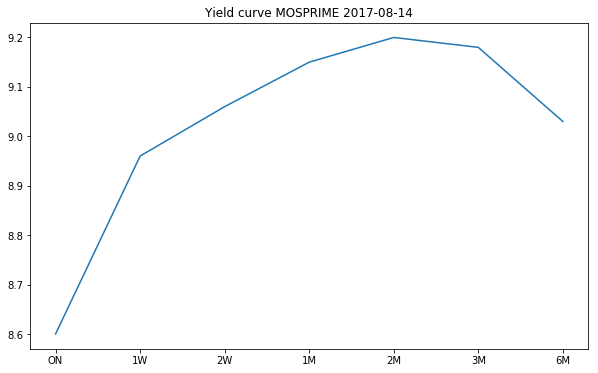

In [60]:
plt.figure(figsize=(10,6))
x=MOSPRIME.columns[1:]
_=plt.plot(y)
_=plt.title('Yield curve MOSPRIME '+date_str)
_=plt.xticks(range(len(x)), x)

In [61]:
columns=list(term_dict.values())[:-1]
# вспомогательный массив для условий форвардных контрактов

In [62]:
columns

['1M', '2M', '3M', '6M']

In [63]:
time=list(term_dict.keys())[:-1]
# вспомогательный массив для условий форвардных контрактов

In [64]:
dates_forward=dates_forward_func(date,time)
# определение форвардных дат

In [65]:
dates_forward_corrected=dates_forward_corrected_func(dates_forward)
# корректировка форвардных дат

In [66]:
df_forward_dates=pd.DataFrame(zip(dates_forward,dates_forward_corrected),columns=['Date','Correct_date'])

In [67]:
df_forward_dates

,Date,Correct_date
0,2017-09-13,2017-09-13
1,2017-10-13,2017-10-13
2,2017-11-12,2017-11-13
3,2018-02-10,2018-02-12


In [68]:
df_realized_long=df_realized_func(MOSPRIME,dates_forward_corrected,columns)
# массив актуальных ставок на форвардные даты

In [69]:
df_realized_long.head()

,Date,Inst,Realized
0,2017-09-13,ON,8.62
1,2017-10-13,ON,8.48
2,2017-11-13,ON,8.22
3,2018-02-12,ON,7.21
4,2017-09-13,1W,8.74


In [70]:
rates=rates_func(date, MOSPRIME,columns)

In [71]:
rates

array([ 0.0915,  0.092 ,  0.0918,  0.0903])

In [72]:
df_forward_rates=forward_rates_func (time,date,rates,df_forward_dates)
# массив форвардных ставок

### Форвардные ставки рассчитываются по формуле простых процентов

## $\frac{1}{t_2t_1}(\frac{(1+r_2t_2)}{(1+r_1t_1)}-1)$

In [73]:
df_forward_rates=df_forward_rates.merge(df_realized_long,left_on=['Date','Inst'],right_on=['Date','Inst']
                                        ,how='left')

In [74]:
df_forward_rates.rename({'Date':'Forward_date'},axis=1)
# итоговый массив форвардных ставок и ставок, актуальных на будущую дату
#NaN означает либо отустсвие котироок инструмента либо то,что будущая дата еще не наступила

,Forward_date,Inst,Notation,Forward_rate,Realized
0,2017-10-13,1M,30x60,9.180002,8.57
1,2017-11-13,2M,30x90,9.125419,8.36
2,2017-11-13,1M,60x90,9.001970,8.36
3,2018-02-12,5M,30x180,8.937849,NaN
4,2018-02-12,4M,60x180,8.809915,NaN
5,2018-02-12,3M,90x180,8.680776,7.44


## 5.Форвардные ставки LIBOR

### Данная часть задания выполняется по аналогии с предыдущей с учетом набора инструментов LIBOR 

In [75]:
date_str='2017-08-14'

In [76]:
date=date_set_func(date_str)

In [77]:
date in date_list

True

In [78]:
y=LIBOR[LIBOR.Date==date][LIBOR.columns[1:]].values[0]

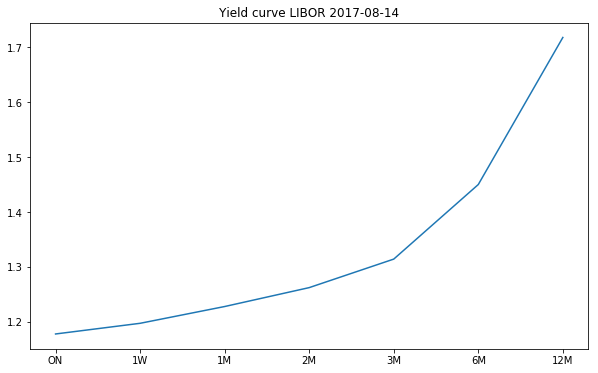

In [79]:
plt.figure(figsize=(10,6))
x=LIBOR.columns[1:]
_=plt.plot(y)
_=plt.title('Yield curve LIBOR '+date_str)
_=plt.xticks(range(len(x)), x)

In [80]:
columns=list(term_dict.values())

In [81]:
columns

['1M', '2M', '3M', '6M', '12M']

In [82]:
time=list(term_dict.keys())

In [83]:
time

[30, 60, 90, 180, 360]

In [84]:
dates_forward=dates_forward_func(date,time)

In [85]:
dates_forward_corrected=dates_forward_corrected_func(dates_forward)

In [86]:
df_forward_dates=pd.DataFrame(zip(dates_forward,dates_forward_corrected),columns=['Date','Correct_date'])

In [87]:
df_forward_dates

,Date,Correct_date
0,2017-09-13,2017-09-13
1,2017-10-13,2017-10-13
2,2017-11-12,2017-11-13
3,2018-02-10,2018-02-12
4,2018-08-09,2018-08-09


In [88]:
df_realized_long=df_realized_func(LIBOR,dates_forward_corrected,columns)

In [89]:
df_realized_long.head()

,Date,Inst,Realized
0,2018-08-09,ON,1.91625
1,2018-02-12,ON,1.44250
2,2017-11-13,ON,1.18278
3,2017-10-13,ON,1.18444
4,2017-09-13,ON,1.17722


In [90]:
rates=rates_func(date, LIBOR,columns)

In [91]:
df_forward_rates=forward_rates_func (time,date,rates,df_forward_dates)

In [92]:
df_forward_rates=df_forward_rates.merge(df_realized_long,left_on=['Date','Inst'],right_on=['Date','Inst']
                                        ,how='left')

In [93]:
df_forward_rates.rename({'Date':'Forward_date'},axis=1)

,Forward_date,Inst,Notation,Forward_rate,Realized
0,2017-10-13,1M,30x60,1.295335,1.23667
1,2017-11-13,2M,30x90,1.355978,1.35600
2,2017-11-13,1M,60x90,1.415093,1.25028
3,2018-02-12,5M,30x180,1.492917,NaN
4,2018-02-12,4M,60x180,1.540649,NaN
5,2018-02-12,3M,90x180,1.580637,1.83338
6,2018-08-09,11M,30x360,1.760644,NaN
7,2018-08-09,10M,60x360,1.805226,NaN
8,2018-08-09,9M,90x360,1.846397,NaN
9,2018-08-09,6M,180x360,1.971487,2.51713


## 6.Форвардный курс 

### Данная часть задания выполняется по аналогии с предыдущими, за исключением расчета форвардного курса

In [94]:
date_str='2017-08-14'

In [95]:
date=date_set_func(date_str)

In [96]:
columns='USD_RUB'

In [97]:
columns_rate=list(term_dict.values())[:-1]
# параметры и условия выбирааем исходя из параметров MOSPRIME

In [98]:
time=list(term_dict.keys())[:-1]

In [99]:
time

[30, 60, 90, 180]

In [100]:
dates_forward=dates_forward_func(date,time)

In [101]:
dates_forward_corrected=dates_forward_corrected_func(dates_forward)

In [102]:
df_realized_long=df_realized_func(USD_RUB,dates_forward_corrected,columns)

In [103]:
df_realized_long.drop('Inst',axis=1,inplace=True)

In [104]:
df_realized_long.rename({'Date':'Forward_date'},axis=1,inplace=True)

In [105]:
df_realized_long['Inst']=columns_rate

In [106]:
df_realized_long

,Forward_date,Realized,Inst
0,2017-09-13,57.2656,1M
1,2017-10-13,57.6869,2M
2,2017-11-13,59.2808,3M
3,2018-02-12,58.1718,6M


In [107]:
rates_MP=rates_func(date, MOSPRIME,columns_rate)
# рублевые ставки

In [108]:
rates_MP

array([ 0.0915,  0.092 ,  0.0918,  0.0903])

In [109]:
rates_LIBOR=rates_func(date, LIBOR,columns_rate)
#  ставки LIBOR

In [110]:
spot_ex_rate=USD_RUB[USD_RUB.Date==date]['USD_RUB']
#  курс спот

In [111]:
float(spot_ex_rate)

60.1873

$F=Sexp((r_{rub}-r_{usd})t/360)$

In [112]:
df_ex_rate=pd.DataFrame(zip(columns_rate,float(spot_ex_rate)*np.exp((rates_MP-rates_LIBOR)*time/base)),
                       columns=['Inst','Forward_ex_rate'])
### расчет форвардного курса 

In [113]:
df_ex_rate=df_ex_rate.merge(df_realized_long)

In [114]:
df_ex_rate

,Inst,Forward_ex_rate,Forward_date,Realized
0,1M,60.585962,2017-09-13,57.2656
1,2M,60.988846,2017-10-13,57.6869
2,3M,61.382571,2017-11-13,59.2808
3,6M,62.512177,2018-02-12,58.1718


### Построение форвардной кривой

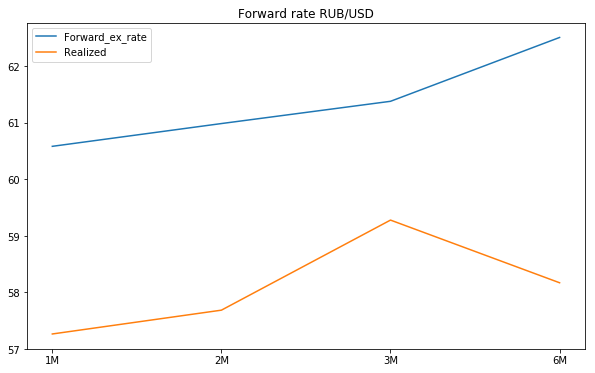

In [115]:
plt.figure(figsize=(10,6))
x=df_ex_rate.Inst
_=plt.plot(df_ex_rate.Forward_ex_rate)
_=plt.plot(df_ex_rate.Realized)
_=plt.xticks(range(len(x)), x)
_=plt.title('Forward rate RUB/USD')
_=plt.legend()

In [116]:
## Задание

In [117]:
### 1. Выбрать любой внешний источник финансовой информации и выгрузить котировки интсрументов денежного рынка
### 2. Рассчитать фовардные ставки для двух валют
### 3. Рассчитать фовардные курсы для одной пары валют
### 4. Сравнить фовардные курсы и ставки с фактическими 
### Максимальный балл за задание получат слушатели, которые провели расчеты для валют, отличных от USD (например EUR, YEN, CHF, GBP)